In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import talib
import pynance as pn   # ← PyNance



In [5]:
# Load your stock data (YOU MUST PLACE YOUR FILE IN THE SAME FOLDER)
df = pd.read_csv("../src/NVDA.csv")

# Standardize column names (important)
df.columns = df.columns.str.title()

# Make sure required columns exist
required_cols = ["Open", "High", "Low", "Close", "Volume"]
print("Found columns:", df.columns.tolist())

missing = [col for col in required_cols if col not in df.columns]
if missing:
    print("❌ Missing columns:", missing)
else:
    print("✅ All required columns found.")

# Convert Date column
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values("Date")
else:
    print("⚠️ No Date column found.")


Found columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
✅ All required columns found.


In [6]:
# Moving Averages
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)
df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)

# RSI
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# MACD
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(
    df['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

# Bollinger Bands
df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(
    df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2
)

# Stochastic Oscillator
df['slowk'], df['slowd'] = talib.STOCH(
    df['High'], df['Low'], df['Close'],
    fastk_period=14,
    slowk_period=3,
    slowd_period=3
)

print("✅ Technical indicators calculated!")
df.head()


✅ Technical indicators calculated!


,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist,upper_band,middle_band,lower_band,slowk,slowd
0,2009-01-02,0.199652,0.201027,0.184294,0.184982,497124000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-05,0.203319,0.207904,0.195984,0.197360,705736000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-06,0.210196,0.216156,0.204695,0.209279,657904000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-07,0.197589,0.205382,0.190483,0.205382,870096000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-08,0.192546,0.195067,0.180626,0.195067,1014496000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Daily returns
# FIXED: Using the standard pandas method .pct_change()
df["Returns"] = df["Close"].pct_change()

# Rolling volatility (20-day)
df["Volatility_20"] = df["Returns"].rolling(20).std()

# Sharpe Ratio (simplified)
# Note: This is an unannualized, simplified 20-day Sharpe Ratio
df["Sharpe"] = df["Returns"].rolling(20).mean() / df["Returns"].rolling(20).std()

# Cumulative returns
df["Cumulative_Returns"] = (1 + df["Returns"]).cumprod()

print("✅ Financial metrics added using pandas!")
print(df.tail())

✅ Financial metrics added using pandas!
           Date      Close       High        Low       Open     Volume  \
3769 2023-12-22  48.805527  49.358247  48.442706  49.170342  252507000   
3770 2023-12-26  49.254299  49.575137  48.935459  48.943454  244200000   
3771 2023-12-27  49.392231  49.655100  49.060397  49.486186  233648000   
3772 2023-12-28  49.497185  49.859003  49.387239  49.618126  246587000   
3773 2023-12-29  49.497185  49.971949  48.726571  49.788039  389293000   

         SMA_20     SMA_50     EMA_20     RSI_14  ...  MACD_hist  upper_band  \
3769  47.706983  46.257777  48.024644  55.352119  ...   0.069914   50.152737   
3770  47.759019  46.334178  48.141754  57.245971  ...   0.073001   50.288523   
3771  47.838989  46.400666  48.260847  57.837928  ...   0.074599   50.466927   
3772  47.908266  46.512367  48.378593  58.310919  ...   0.072906   50.632585   
3773  48.046003  46.658888  48.485126  58.310919  ...   0.062374   50.799025   

      middle_band  lower_band     

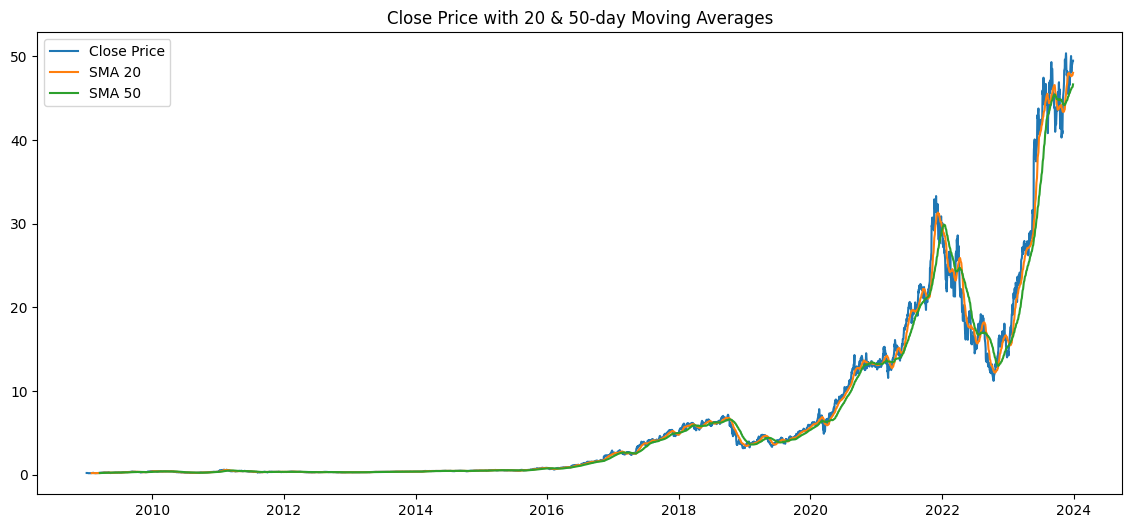

In [8]:
plt.figure(figsize=(14,6))
plt.plot(df["Date"], df["Close"], label="Close Price")
plt.plot(df["Date"], df["SMA_20"], label="SMA 20")
plt.plot(df["Date"], df["SMA_50"], label="SMA 50")
plt.title("Close Price with 20 & 50-day Moving Averages")
plt.legend()
plt.show()


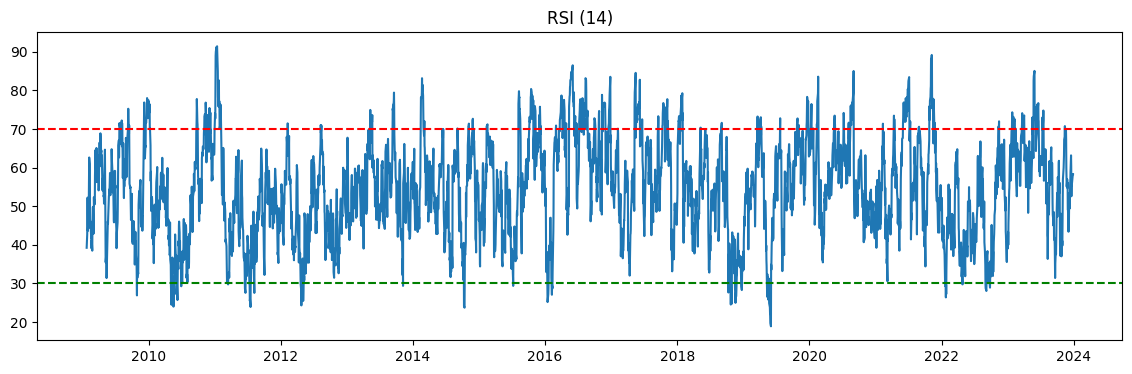

In [9]:
plt.figure(figsize=(14,4))
plt.plot(df["Date"], df["RSI_14"])
plt.axhline(70, color="red", linestyle="--")
plt.axhline(30, color="green", linestyle="--")
plt.title("RSI (14)")
plt.show()


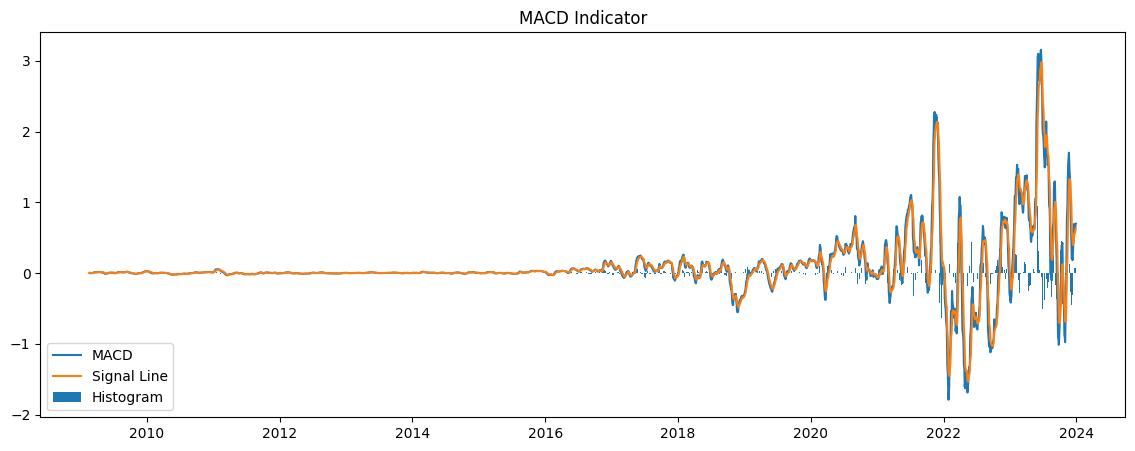

In [10]:
plt.figure(figsize=(14,5))
plt.plot(df["Date"], df["MACD"], label="MACD")
plt.plot(df["Date"], df["MACD_signal"], label="Signal Line")
plt.bar(df["Date"], df["MACD_hist"], label="Histogram")
plt.title("MACD Indicator")
plt.legend()
plt.show()


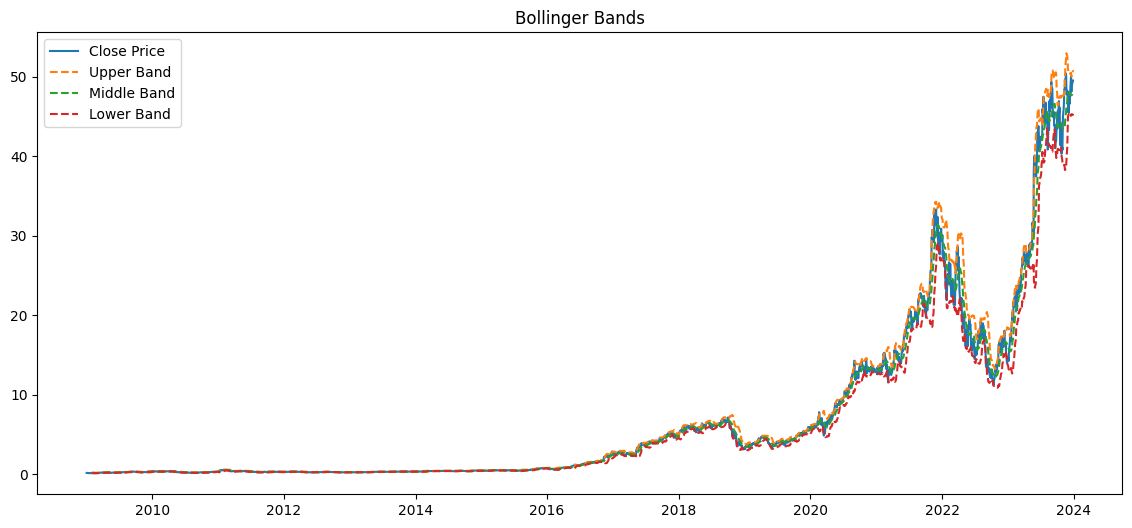

In [11]:
plt.figure(figsize=(14,6))
plt.plot(df["Date"], df["Close"], label="Close Price")
plt.plot(df["Date"], df["upper_band"], label="Upper Band", linestyle="--")
plt.plot(df["Date"], df["middle_band"], label="Middle Band", linestyle="--")
plt.plot(df["Date"], df["lower_band"], label="Lower Band", linestyle="--")
plt.title("Bollinger Bands")
plt.legend()
plt.show()


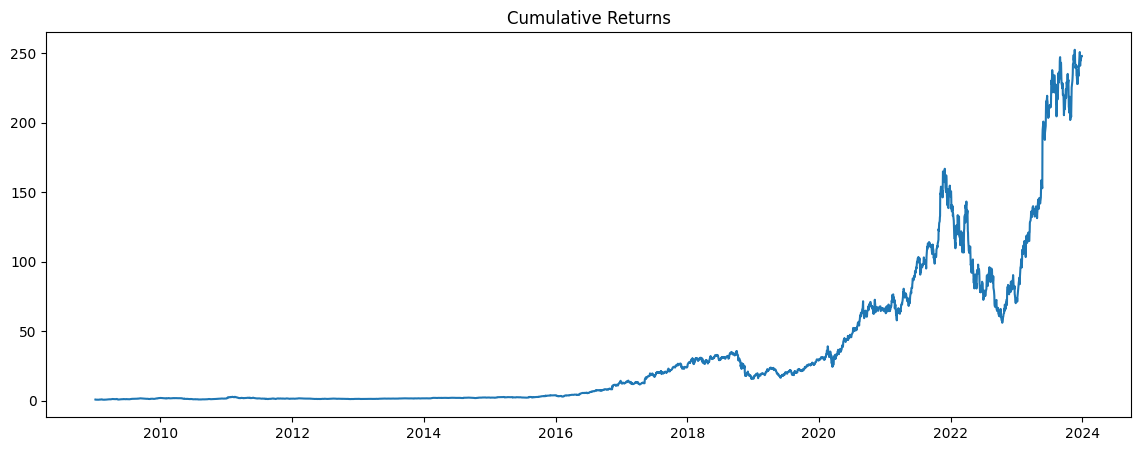

In [12]:
plt.figure(figsize=(14,5))
plt.plot(df["Date"], df["Cumulative_Returns"])
plt.title("Cumulative Returns")
plt.show()


In [13]:
summary = df[[
    "Close", "SMA_20", "SMA_50", "RSI_14",
    "MACD", "MACD_signal", "Volatility_20", "Sharpe"
]].tail(10)

summary


,Close,SMA_20,SMA_50,RSI_14,MACD,MACD_signal,Volatility_20,Sharpe
3764,48.865501,47.732439,45.956963,58.765888,0.448417,0.406204,0.018374,-0.023647
3765,50.051899,47.771586,46.043300,63.164028,0.610224,0.447008,0.019160,0.050279
3766,49.579140,47.731577,46.129956,60.399383,0.692328,0.496072,0.018591,-0.034195
3767,48.086884,47.640193,46.176273,52.576776,0.629724,0.522803,0.019654,-0.085447
3768,48.965446,47.654100,46.220013,56.175512,0.643584,0.546959,0.019359,0.023941
3769,48.805527,47.706983,46.257777,55.352119,0.634352,0.564438,0.018823,0.067203
3770,49.254299,47.759019,46.334178,57.245971,0.655689,0.582688,0.018810,0.065764
3771,49.392231,47.838989,46.400666,57.837928,0.675937,0.601338,0.018665,0.097156
3772,49.497185,47.908266,46.512367,58.310919,0.692470,0.619564,0.018630,0.085136
3773,49.497185,48.046003,46.658888,58.310919,0.697532,0.635158,0.017250,0.174436
